# Final Project - Bilal Najar

In [1]:
!pip install pretty_midi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.0 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592287 sha256=b170aa9700c00e64ffccc57f025d6c15baa9eea33768802961fbd143b8189634
  Stored in directory: /root/.cache/pip/wheels/cd/a5/30/7b8b7f58709f5150f67f98fde4b891ebf0be9ef07a8af49f25
Successfully built pretty_midi
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1


# Feature Extraction

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load preprocessed data
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/preprocessed_features_dataset_encoded.csv')
print('Preprocessed data loaded successfully')
df.head()


Mounted at /content/drive
Preprocessed data loaded successfully


,composer,instrument_program,is_drum,start,end,pitch,velocity,tempo_mean,tempo_min,tempo_max,tempo_var,key_mean,key_min,key_max,key_var,time_numerator_mean,time_denominator_mean
0,3,68,False,0.001530,0.002787,0.673469,0.674603,0.353389,0.0,0.080288,0.026982,0.136364,0.136364,0.130435,0.0,0.333333,0.25
1,3,68,False,0.001530,0.002787,0.591837,0.674603,0.353389,0.0,0.080288,0.026982,0.136364,0.136364,0.130435,0.0,0.333333,0.25
2,3,68,False,0.003060,0.004316,0.714286,0.674603,0.353389,0.0,0.080288,0.026982,0.136364,0.136364,0.130435,0.0,0.333333,0.25
3,3,68,False,0.003060,0.004316,0.622449,0.674603,0.353389,0.0,0.080288,0.026982,0.136364,0.136364,0.130435,0.0,0.333333,0.25
4,3,68,False,0.004589,0.005886,0.744898,0.674603,0.353389,0.0,0.080288,0.026982,0.136364,0.136364,0.130435,0.0,0.333333,0.25


# Data Cleaning and Preprocessing

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

original_df = pd.read_csv('/content/drive/MyDrive/preprocessed_features_dataset_encoded.csv')

# Create a copy of the original dataset for preprocessing
df = original_df.copy()

# Handling missing values
df.fillna(method='ffill', inplace=True)

# Normalizing features
scaler = MinMaxScaler()
df[['start', 'end', 'pitch', 'velocity', 'tempo_mean', 'tempo_min', 'tempo_max', 'tempo_var', 'key_mean', 'key_min', 'key_max', 'key_var', 'time_numerator_mean', 'time_denominator_mean']] = scaler.fit_transform(df[['start', 'end', 'pitch', 'velocity', 'tempo_mean', 'tempo_min', 'tempo_max', 'tempo_var', 'key_mean', 'key_min', 'key_max', 'key_var', 'time_numerator_mean', 'time_denominator_mean']])

# Encoding categorical data
label_encoder = LabelEncoder()
df['composer'] = label_encoder.fit_transform(df['composer'])

# Save the preprocessed data to a new CSV file
df.to_csv('preprocessed_features_dataset_encoded.csv', index=False)

print("Data Cleaning and Preprocessing Complete and saved to 'preprocessed_features_dataset_encoded.csv'")
df.head()

<ipython-input-3-2e224002676a>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Data Cleaning and Preprocessing Complete and saved to 'preprocessed_features_dataset_encoded.csv'


,composer,instrument_program,is_drum,start,end,pitch,velocity,tempo_mean,tempo_min,tempo_max,tempo_var,key_mean,key_min,key_max,key_var,time_numerator_mean,time_denominator_mean
0,3,68,False,0.001530,0.002787,0.673469,0.674603,0.353389,0.0,0.080288,0.026982,0.136364,0.136364,0.130435,0.0,0.333333,0.25
1,3,68,False,0.001530,0.002787,0.591837,0.674603,0.353389,0.0,0.080288,0.026982,0.136364,0.136364,0.130435,0.0,0.333333,0.25
2,3,68,False,0.003060,0.004316,0.714286,0.674603,0.353389,0.0,0.080288,0.026982,0.136364,0.136364,0.130435,0.0,0.333333,0.25
3,3,68,False,0.003060,0.004316,0.622449,0.674603,0.353389,0.0,0.080288,0.026982,0.136364,0.136364,0.130435,0.0,0.333333,0.25
4,3,68,False,0.004589,0.005886,0.744898,0.674603,0.353389,0.0,0.080288,0.026982,0.136364,0.136364,0.130435,0.0,0.333333,0.25


# Train-Validation-Test Split

In [4]:
from sklearn.model_selection import train_test_split

# Load the preprocessed data
df = pd.read_csv('/content/drive/MyDrive/preprocessed_features_dataset_encoded.csv')

# Define the features (X) and target (y)
X = df.drop(columns=['composer'])
y = df['composer']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=27)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=27)

print("Train-Validation-Test Split Complete")
print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Train-Validation-Test Split Complete
Training set size: 1179089
Validation set size: 252662
Test set size: 252662


# Model Building (CNN)

In [5]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define the CNN model
def create_cnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Dropout(0.2))
    model.add(Conv1D(128, kernel_size=2, activation='relu'))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Get input shape and number of classes
input_shape = (X_train.shape[1], 1)
num_classes = len(set(y_train))

# Create and compile the CNN model
cnn_model = create_cnn_model(input_shape, num_classes)
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("CNN Model Created")

CNN Model Created


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Model Training (CNN)

In [6]:
import numpy as np

# Reshape data for CNN model
X_train_cnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1)).astype(np.float32)
X_val_cnn = X_val.values.reshape((X_val.shape[0], X_val.shape[1], 1)).astype(np.float32)

# Check the shape of the reshaped data
print(f"Training data shape for CNN: {X_train_cnn.shape}")
print(f"Validation data shape for CNN: {X_val_cnn.shape}")

# Train CNN model
history_cnn = cnn_model.fit(X_train_cnn, y_train, validation_data=(X_val_cnn, y_val), epochs=10, batch_size=32)
print("CNN Model Training Complete")

Training data shape for CNN: (1179089, 16, 1)
Validation data shape for CNN: (252662, 16, 1)
Epoch 1/10
36847/36847 ━━━━━━━━━━━━━━━━━━━━ 384s 10ms/step - accuracy: 0.8459 - loss: 0.3921 - val_accuracy: 0.9614 - val_loss: 0.1032
Epoch 2/10
36847/36847 ━━━━━━━━━━━━━━━━━━━━ 389s 11ms/step - accuracy: 0.9555 - loss: 0.1172 - val_accuracy: 0.9771 - val_loss: 0.0583
Epoch 3/10
36847/36847 ━━━━━━━━━━━━━━━━━━━━ 392s 11ms/step - accuracy: 0.9659 - loss: 0.0890 - val_accuracy: 0.9787 - val_loss: 0.0524
Epoch 4/10
36847/36847 ━━━━━━━━━━━━━━━━━━━━ 440s 11ms/step - accuracy: 0.9700 - loss: 0.0771 - val_accuracy: 0.9810 - val_loss: 0.0490
Epoch 5/10
36847/36847 ━━━━━━━━━━━━━━━━━━━━ 448s 11ms/step - accuracy: 0.9727 - loss: 0.0701 - val_accuracy: 0.9791 - val_loss: 0.0481
Epoch 6/10
36847/36847 ━━━━━━━━━━━━━━━━━━━━ 382s 10ms/step - accuracy: 0.9740 - loss: 0.0662 - val_accuracy: 0.9829 - val_loss: 0.0404
Epoch 7/10
36847/36847 ━━━━━━━━━━━━━━━━━━━━ 382s 10ms/step - accuracy: 0.9756 - loss: 0.0630 - va

# Model Evaluation (CNN)

Test data shape for CNN: (252662, 16, 1)
7896/7896 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step
CNN Model Evaluation:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     50736
           1       0.98      0.99      0.99    101032
           2       0.98      0.96      0.97     48029
           3       0.99      0.99      0.99     52865

    accuracy                           0.99    252662
   macro avg       0.99      0.98      0.98    252662
weighted avg       0.99      0.99      0.99    252662

Confusion Matrix:
[[50520   105    97    14]
 [  151 99986   557   338]
 [  205  1143 46240   441]
 [   15   508   200 52142]]
CNN Model Accuracy: 0.9851
CNN Model Precision: 0.9851
CNN Model Recall: 0.9851


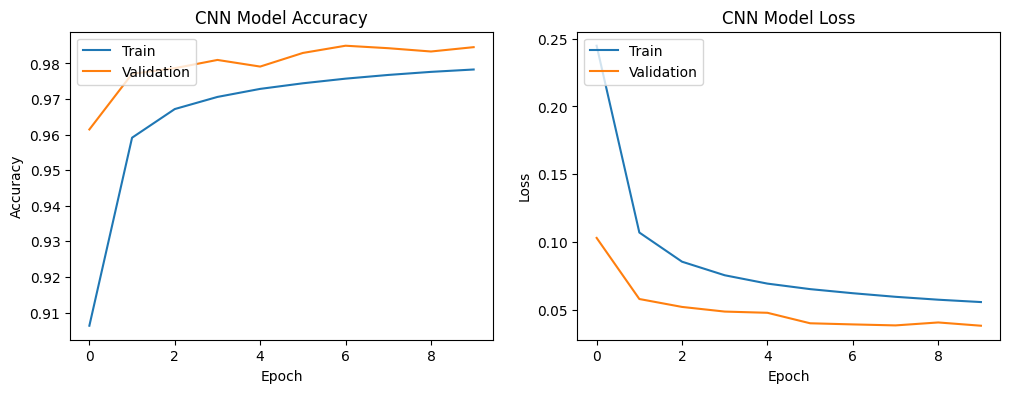

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

# Reshape and convert test data for CNN model
X_test_cnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1)).astype(np.float32)

# Check the shape of the test data
print(f"Test data shape for CNN: {X_test_cnn.shape}")

# Predict the classes for the test set
y_pred_cnn = cnn_model.predict(X_test_cnn).argmax(axis=1)

# Classification report and confusion matrix
print("CNN Model Evaluation:")
print(classification_report(y_test, y_pred_cnn))

conf_matrix_cnn = confusion_matrix(y_test, y_pred_cnn)
print("Confusion Matrix:")
print(conf_matrix_cnn)

# Calculate and print accuracy, precision, and recall
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
precision_cnn = precision_score(y_test, y_pred_cnn, average='weighted')
recall_cnn = recall_score(y_test, y_pred_cnn, average='weighted')

print(f"CNN Model Accuracy: {accuracy_cnn:.4f}")
print(f"CNN Model Precision: {precision_cnn:.4f}")
print(f"CNN Model Recall: {recall_cnn:.4f}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Model Building (LSTM)

In [8]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
def create_lstm_model(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(128))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# Get input shape and number of classes
input_shape = (X_train.shape[1], 1)
num_classes = len(set(y_train))

# Create and compile the LSTM model
lstm_model = create_lstm_model(input_shape, num_classes)
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("LSTM Model Created")

LSTM Model Created


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Model Training (LSTM)

In [9]:
# Reshape data for LSTM model
X_train_lstm = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1)).astype(np.float32)
X_val_lstm = X_val.values.reshape((X_val.shape[0], X_val.shape[1], 1)).astype(np.float32)

# Check the shape of the reshaped data
print(f"Training data shape for LSTM: {X_train_lstm.shape}")
print(f"Validation data shape for LSTM: {X_val_lstm.shape}")

# Train LSTM model
history_lstm = lstm_model.fit(X_train_lstm, y_train, validation_data=(X_val_lstm, y_val), epochs=10, batch_size=32)
print("LSTM Model Training Complete")

Training data shape for LSTM: (1179089, 16, 1)
Validation data shape for LSTM: (252662, 16, 1)
Epoch 1/10
36847/36847 ━━━━━━━━━━━━━━━━━━━━ 2265s 61ms/step - accuracy: 0.7827 - loss: 0.5089 - val_accuracy: 0.9704 - val_loss: 0.0706
Epoch 2/10
36847/36847 ━━━━━━━━━━━━━━━━━━━━ 2390s 64ms/step - accuracy: 0.9691 - loss: 0.0798 - val_accuracy: 0.9746 - val_loss: 0.0652
Epoch 3/10
36847/36847 ━━━━━━━━━━━━━━━━━━━━ 2330s 63ms/step - accuracy: 0.9789 - loss: 0.0549 - val_accuracy: 0.9870 - val_loss: 0.0309
Epoch 4/10
36847/36847 ━━━━━━━━━━━━━━━━━━━━ 2313s 63ms/step - accuracy: 0.9823 - loss: 0.0452 - val_accuracy: 0.9847 - val_loss: 0.0372
Epoch 5/10
36847/36847 ━━━━━━━━━━━━━━━━━━━━ 2371s 63ms/step - accuracy: 0.9847 - loss: 0.0392 - val_accuracy: 0.9865 - val_loss: 0.0311
Epoch 6/10
36847/36847 ━━━━━━━━━━━━━━━━━━━━ 2354s 63ms/step - accuracy: 0.9858 - loss: 0.0360 - val_accuracy: 0.9885 - val_loss: 0.0281
Epoch 7/10
36847/36847 ━━━━━━━━━━━━━━━━━━━━ 2330s 63ms/step - accuracy: 0.9865 - loss: 0.

# Model Evaluation (LSTM)

Test data shape for LSTM: (252662, 16, 1)
7896/7896 ━━━━━━━━━━━━━━━━━━━━ 161s 20ms/step
LSTM Model Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     50736
           1       0.99      0.98      0.99    101032
           2       0.97      0.99      0.98     48029
           3       0.97      0.99      0.98     52865

    accuracy                           0.99    252662
   macro avg       0.98      0.99      0.99    252662
weighted avg       0.99      0.99      0.99    252662

Confusion Matrix:
[[50392    20   105   219]
 [  102 98978   892  1060]
 [   62   517 47329   121]
 [    8   278   365 52214]]
LSTM Model Accuracy: 0.9852
LSTM Model Precision: 0.9853
LSTM Model Recall: 0.9852


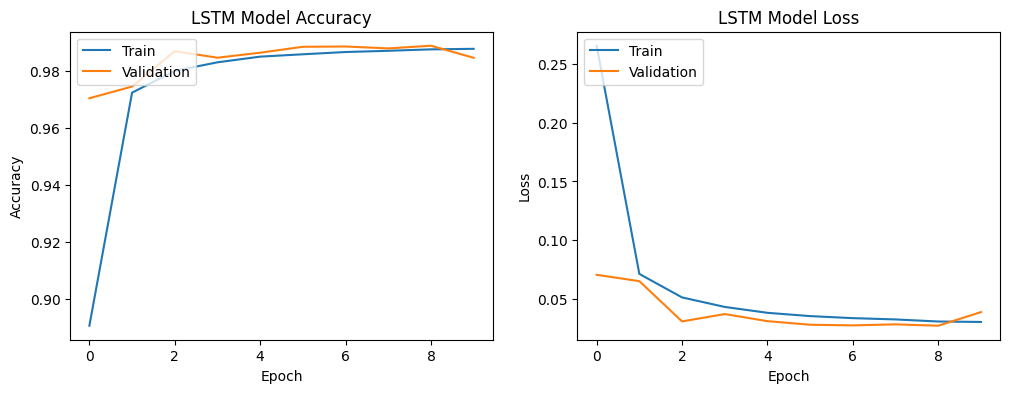

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

# Reshape and convert test data for LSTM model
X_test_lstm = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1)).astype(np.float32)

# Check the shape of the test data
print(f"Test data shape for LSTM: {X_test_lstm.shape}")

# Predict the classes for the test set
y_pred_lstm = lstm_model.predict(X_test_lstm).argmax(axis=1)

# Classification report and confusion matrix
print("LSTM Model Evaluation:")
print(classification_report(y_test, y_pred_lstm))

conf_matrix_lstm = confusion_matrix(y_test, y_pred_lstm)
print("Confusion Matrix:")
print(conf_matrix_lstm)

# Calculate and print accuracy, precision, and recall
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
precision_lstm = precision_score(y_test, y_pred_lstm, average='weighted')
recall_lstm = recall_score(y_test, y_pred_lstm, average='weighted')

print(f"LSTM Model Accuracy: {accuracy_lstm:.4f}")
print(f"LSTM Model Precision: {precision_lstm:.4f}")
print(f"LSTM Model Recall: {recall_lstm:.4f}")

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])
plt.title('LSTM Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('LSTM Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()